In [ ]:
import sys

import numpy as np
import pandas as pd

# Remove any cached tf modules before importing
for key in list(sys.modules.keys()):
    if 'tensorflow' in key:
        del sys.modules[key]

import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Dataset

In [139]:
pillow_image = Image.open(
    "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
image_array = np.array(pillow_image)
print(image_array.shape)

(1152, 1422)


In [140]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1. / 255)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [141]:
train_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/chest_xray/train"
test_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/test"

In [142]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary"
)

test_data = valid_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary"
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [143]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomShear(0.2)
])


In [144]:
model = tf.keras.Sequential([

    data_augmentation,

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(1, activation="sigmoid")
])


/Users/Bilal/Library/Caches/pypoetry/virtualenvs/learningai-CT_la5mx-py3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=["accuracy"])

In [146]:
history_1 = model.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data
                      )

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.7400 - loss: 0.5881 - val_accuracy: 0.6250 - val_loss: 0.6900
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.7373 - loss: 0.5651 - val_accuracy: 0.6042 - val_loss: 0.6695
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 231ms/step - accuracy: 0.7324 - loss: 0.5446 - val_accuracy: 0.6154 - val_loss: 0.7043
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.7414 - loss: 0.5148 - val_accuracy: 0.6667 - val_loss: 0.6565
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.7763 - loss: 0.4526 - val_accuracy: 0.7308 - val_loss: 0.5324
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.7991 - loss: 0.4257 - val_accuracy: 0.6923 - val_loss: 0.6240
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.8127 - loss: 0.3829 - val_accuracy: 0.7436 - val_loss: 0.5456
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.8175 - loss: 0

<Axes: >

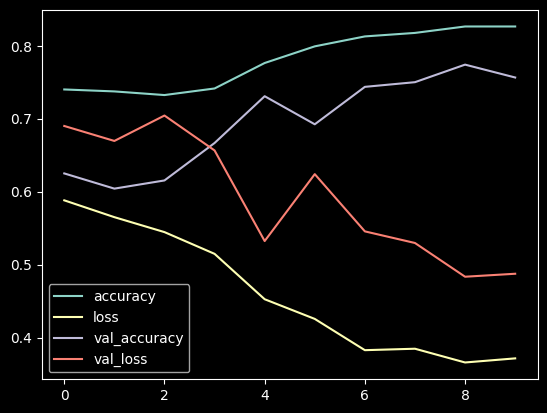

In [147]:
pd.DataFrame(history_1.history).plot()